In [ ]:
!pip3 install xarray netCDF4 h5netcdf

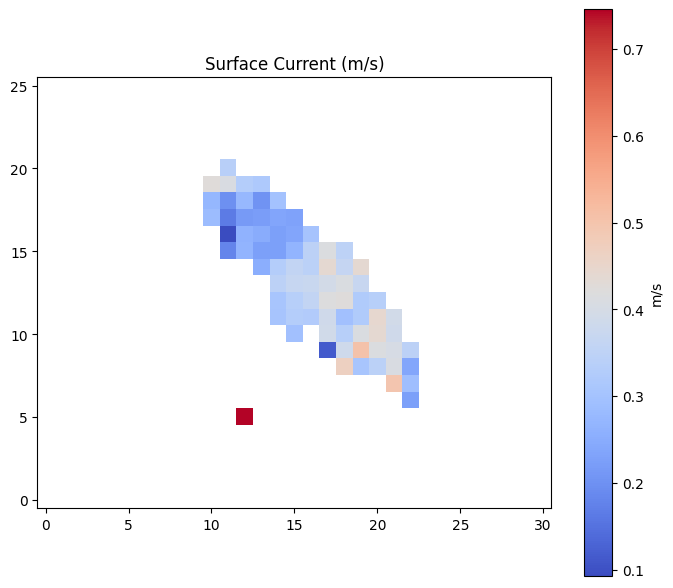

    Variable          Dimensions           Shape Data Type
0        Lat  ('time', 'y', 'x')  (3863, 26, 31)   float32
1        Lon  ('time', 'y', 'x')  (3863, 26, 31)   float32
2       Time           ('time',)         (3863,)   float64
3     Status  ('time', 'y', 'x')  (3863, 26, 31)      int8
4      Depth  ('time', 'y', 'x')  (3863, 26, 31)   float32
5    Current  ('time', 'y', 'x')  (3863, 26, 31)   float32
6     CAngle  ('time', 'y', 'x')  (3863, 26, 31)   float32
7   WaveLgth  ('time', 'y', 'x')  (3863, 26, 31)   float32
8     Period  ('time', 'y', 'x')  (3863, 26, 31)   float32
9     WAngle  ('time', 'y', 'x')  (3863, 26, 31)   float32
10  WaveHght  ('time', 'y', 'x')  (3863, 26, 31)   float32
11     Sigma  ('time', 'y', 'x')  (3863, 26, 31)   float32


In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the NetCDF file
file_path = "xband_resolution_200m_2016.nc"
ds = xr.open_dataset(file_path, decode_times=False)

# Extract metadata for tabular display
metadata = {
    "Variable": list(ds.data_vars),
    "Dimensions": [str(ds[var].dims) for var in ds.data_vars],
    "Shape": [ds[var].shape for var in ds.data_vars],
    "Data Type": [str(ds[var].dtype) for var in ds.data_vars]
}
metadata_df = pd.DataFrame(metadata)

# Extract surface current data for the first time step
sample_time_index = 0
current = ds["Current"].isel(time=sample_time_index)

# Plot surface current
plt.figure(figsize=(7, 6))
im = plt.imshow(current, cmap="coolwarm", origin="lower")
plt.title("Surface Current (m/s)")
plt.colorbar(im, orientation='vertical', label='m/s')
plt.tight_layout()
plt.show()

# Display metadata table
print(metadata_df)


In [15]:
current.values

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan],


In [16]:
from scipy.sparse import csr_matrix

# Replace NaNs with 0s
matrix_cleaned = np.nan_to_num(current.values, nan=0.0)

# Convert to CSR matrix directly
csr = csr_matrix(matrix_cleaned)

In [21]:
print(csr)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 79 stored elements and shape (26, 31)>
  Coords	Values
  (5, 12)	0.7459999918937683
  (6, 22)	0.22499999403953552
  (7, 21)	0.4970000088214874
  (7, 22)	0.29100000858306885
  (8, 18)	0.4650000035762787
  (8, 19)	0.3089999854564667
  (8, 20)	0.3440000116825104
  (8, 21)	0.40700000524520874
  (8, 22)	0.23999999463558197
  (9, 17)	0.11299999803304672
  (9, 18)	0.38499999046325684
  (9, 19)	0.5049999952316284
  (9, 20)	0.4129999876022339
  (9, 21)	0.4020000100135803
  (9, 22)	0.34599998593330383
  (10, 15)	0.29499998688697815
  (10, 17)	0.38999998569488525
  (10, 18)	0.3370000123977661
  (10, 19)	0.41100001335144043
  (10, 20)	0.43799999356269836
  (10, 21)	0.38600000739097595
  (11, 14)	0.3059999942779541
  (11, 15)	0.33000001311302185
  (11, 16)	0.32600000500679016
  (11, 17)	0.3869999945163727
  :	:
  (15, 16)	0.34599998593330383
  (15, 17)	0.4129999876022339
  (15, 18)	0.3479999899864197
  (16, 11)	0.09200000017881393
  (16,

In [2]:
matrix = current.values

In [3]:
# Optional: Print a portion of the matrix
print("2D Array (matrix) shape:", matrix.shape)
print("Sample matrix data:")

2D Array (matrix) shape: (26, 31)
Sample matrix data:


In [6]:
matrix_df_filled = matrix_df.fillna(0)
print(matrix_df_filled)

     0    1    2    3    4    5    6    7    8    9   ...     21     22   23  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.000  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000  0.225  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.497  0.291  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.407  0.240  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.402  0.346  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.386  0.000  0.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [10]:
# Start with the original matrix
matrix = current.values

# Replace NaN with 0 (optional: depends on how you want to treat NaNs)
matrix_cleaned = np.nan_to_num(matrix, nan=0.0)

# Find rows and columns with any non-zero values
nonzero_rows = np.any(matrix_cleaned != 0, axis=1)
nonzero_cols = np.any(matrix_cleaned != 0, axis=0)

# Crop the matrix to these rows and columns
dense_matrix = matrix_cleaned[nonzero_rows][:, nonzero_cols]

# Convert to DataFrame for easy viewing (optional)
dense_df = pd.DataFrame(dense_matrix)

# Display the result
print(dense_df)

       0      1      2      3      4      5      6      7      8      9   \
0   0.000  0.000  0.746  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
2   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
3   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.465  0.309   
4   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.113  0.385  0.505   
5   0.000  0.000  0.000  0.000  0.000  0.295  0.000  0.390  0.337  0.411   
6   0.000  0.000  0.000  0.000  0.306  0.330  0.326  0.387  0.296  0.324   
7   0.000  0.000  0.000  0.000  0.308  0.337  0.360  0.417  0.423  0.322   
8   0.000  0.000  0.000  0.000  0.346  0.366  0.372  0.394  0.409  0.370   
9   0.000  0.000  0.000  0.254  0.331  0.358  0.343  0.439  0.365  0.438   
10  0.000  0.179  0.268  0.227  0.225  0.266  0.346  0.413  0.348  0.000   
11  0.000  0.092  0.261  0.249  0.227  0.237  0.303  0.000  0.000  0.000   
12  0.286  0

In [8]:
ds

<xarray.Dataset> Size: 128MB
Dimensions:   (time: 3863, y: 26, x: 31)
Dimensions without coordinates: time, y, x
Data variables:
    Lat       (time, y, x) float32 12MB ...
    Lon       (time, y, x) float32 12MB ...
    Time      (time) float64 31kB ...
    Status    (time, y, x) int8 3MB ...
    Depth     (time, y, x) float32 12MB ...
    Current   (time, y, x) float32 12MB ...
    CAngle    (time, y, x) float32 12MB ...
    WaveLgth  (time, y, x) float32 12MB ...
    Period    (time, y, x) float32 12MB ...
    WAngle    (time, y, x) float32 12MB ...
    WaveHght  (time, y, x) float32 12MB ...
    Sigma     (time, y, x) float32 12MB ...
Attributes: (12/48)
    comment:                         Depth values higher than 50 m are delete...
    time_coverage_resolution:        15 minutes
    geospatial_vertical_max:         nan
    sea_name:                        North Sea
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    publisher_name:                  Sam Bom
    processing_level:                final
    publisher_email:                 sbom@tudelft.nl
    date_created:                    2016-12-13T01:48:17Z
    uuid:                            b3430b9d-6b35-4c88-b02a-2b83f184615c
    date_modified:                   2016-12-13T01:48:17Z